In [128]:
# DATA SPRINT 26 , Crop  Recommendation
# ------------------- Importing Libraries----------------------------------------
# importing pandas for reading the csv files 
import pandas as pd
# Importing numpy for array operations & complex calculations
import numpy as np
# ------------------importing matplotlib & seaborn for plotting graphs in order to visualise the data & get insights--------------------
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Label Encoder from sklearn for converting( In this case it is 'Crop') 
# Categorical Data that is in text format to numerical format
from sklearn.preprocessing import LabelEncoder



# ----------Importing all the classifier algorithms in order to select the one with best parameters------------
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
# ------------------------------------------------







#-------importing train & test split from sklearn------------
from sklearn.model_selection import train_test_split


# -------------Grid Search CV--------------
from sklearn.model_selection import GridSearchCV

# For evaluation of metrics
from sklearn.metrics import confusion_matrix
# import mean squared error from sklearn.metric
from sklearn.metrics import accuracy_score
# -----------------------------------------------------------------------





In [129]:
# Reading the csv file , getting insights from data like getting information about columns, null values etc
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

In [130]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


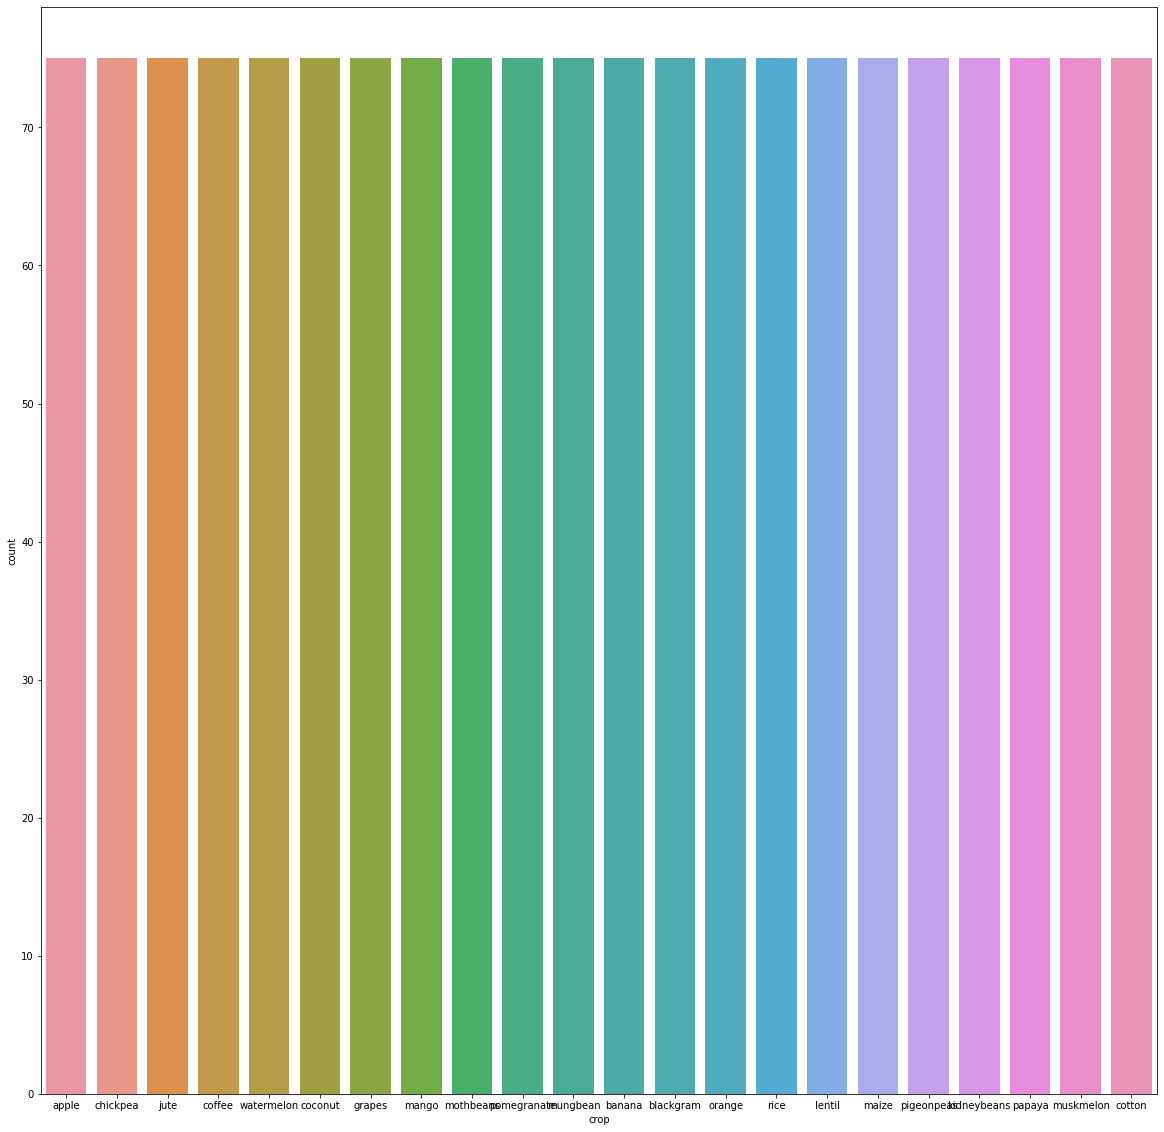

In [132]:


plt.figure(figsize=(20,20))
sns.countplot(x=train_data['crop'], data = train_data)
plt.show()

In [133]:
# Checking values of the column crop
train_data['crop'].unique()

array(['apple', 'chickpea', 'jute', 'coffee', 'watermelon', 'coconut',
       'grapes', 'mango', 'mothbeans', 'pomegranate', 'mungbean',
       'banana', 'blackgram', 'orange', 'rice', 'lentil', 'maize',
       'pigeonpeas', 'kidneybeans', 'papaya', 'muskmelon', 'cotton'],
      dtype=object)

In [134]:
# checking null values
train_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [135]:

train_data['crop'].value_counts()

rice           75
apple          75
coffee         75
grapes         75
mothbeans      75
blackgram      75
jute           75
mungbean       75
mango          75
papaya         75
cotton         75
pigeonpeas     75
lentil         75
chickpea       75
kidneybeans    75
pomegranate    75
coconut        75
orange         75
watermelon     75
maize          75
muskmelon      75
banana         75
Name: crop, dtype: int64

In [136]:
#  Categorical Data that is in text format to numerical format

le = LabelEncoder()
train_data.crop = le.fit_transform(train_data.crop)

In [137]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,0
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,3
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,8
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,5
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,3


In [59]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,0.125000,0.935714,0.955,0.430379,0.889364,0.367690,0.297249,0
1,0.360294,0.457143,0.385,0.264361,0.012696,0.583138,0.220802,3
2,0.544118,0.314286,0.165,0.413712,0.667117,0.618224,0.518106,8
3,0.764706,0.214286,0.115,0.539084,0.424620,0.539550,0.444412,5
4,0.169118,0.478571,0.395,0.285426,0.033349,0.529646,0.214116,3


In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 103.2 KB


In [139]:
# Splitting the data into X & y
X = train_data.drop('crop', axis = 1) # here we are dropping the target feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = train_data['crop'] # Output/Dependent variable

In [140]:
# ---------GRID SEARCH CV passing the information of columns with required parameters in order to get the best one--------------------------------

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,15]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussinaoanNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }  
}

In [144]:


# Getting the best parameters.
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=6, return_train_score=False)
    clf.fit(X, y)
    scores.append({        
        'model': model_name,
        
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.989697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.992727,{'n_estimators': 15}
2,logistic_regression,0.965455,{'C': 15}
3,naive_bayes_gaussian,0.993939,{}
4,naive_bayes_multinomial,0.898788,{}
5,decision_tree,0.981818,{'criterion': 'gini'}


We can the see the best is random forest Classifier & naive bayes classifier.

In [156]:
# Data splitting into train and test split in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [149]:
# Using random forest classifier
RF = RandomForestClassifier(n_estimators=15)

In [157]:
# Fitting the model on X_train & y_train
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
# Predicting that on X_test
pred = RF.predict(X_test)

In [160]:
# Printing the accuracy score
print('Accuracy Score is: ', accuracy_score(y_test, pred))

Accuracy Score is:  0.9919191919191919


In [163]:
target = RF.predict(test_data)

In [173]:
# Checking the model on Gaussian Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [174]:
# Predicting that on X_test
pre = clf.predict(X_test)

In [175]:
# Getting the accuracy score
print('Accuracy Score is: ', accuracy_score(y_test, pre))

Accuracy Score is:  0.9939393939393939


We can observe that in random forest classifier the accuracy was 
0.9919191919191919  ~ (99.1%)
& in Gaussian Naiye Bayes Classifier it is 0.9939393939393939 ~ 
(99.3%)

In [176]:
# Loading the test unseen data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [177]:
# Getting the information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            550 non-null    float64
 1   P            550 non-null    float64
 2   K            550 non-null    float64
 3   temperature  550 non-null    float64
 4   humidity     550 non-null    float64
 5   ph           550 non-null    float64
 6   rainfall     550 non-null    float64
dtypes: float64(7)
memory usage: 30.2 KB


In [178]:
# storing the predicted values of test_data in target variable
target = clf.predict(test_data)

In [179]:
target

array([13,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12, 11,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18, 13,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  8, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2, 20, 13, 15, 13,  8, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17, 13, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11, 11,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

In [180]:
# Using inverse transform in order to get back original values
target = le.inverse_transform(target)

In [181]:
target

array(['mothbeans', 'cotton', 'mango', 'lentil', 'mungbean', 'coffee',
       'lentil', 'cotton', 'lentil', 'lentil', 'jute', 'mothbeans',
       'orange', 'banana', 'coconut', 'muskmelon', 'grapes', 'coffee',
       'watermelon', 'mungbean', 'coconut', 'rice', 'mothbeans', 'maize',
       'apple', 'orange', 'rice', 'watermelon', 'pomegranate',
       'mothbeans', 'kidneybeans', 'mungbean', 'banana', 'papaya',
       'blackgram', 'chickpea', 'kidneybeans', 'coconut', 'lentil',
       'papaya', 'grapes', 'grapes', 'rice', 'chickpea', 'grapes',
       'pigeonpeas', 'watermelon', 'pigeonpeas', 'watermelon', 'mango',
       'maize', 'mango', 'grapes', 'pigeonpeas', 'rice', 'kidneybeans',
       'apple', 'coconut', 'watermelon', 'apple', 'mungbean', 'coffee',
       'watermelon', 'mungbean', 'apple', 'kidneybeans', 'orange',
       'grapes', 'watermelon', 'coconut', 'maize', 'pomegranate',
       'cotton', 'apple', 'maize', 'jute', 'mothbeans', 'cotton',
       'cotton', 'pigeonpeas', 'pige

In [182]:
# y_predicted stores predicted values again 
y_predicted = clf.predict(X_test)

In [183]:
# For plotting the confusion matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,

Text(69.0, 0.5, 'Truth')

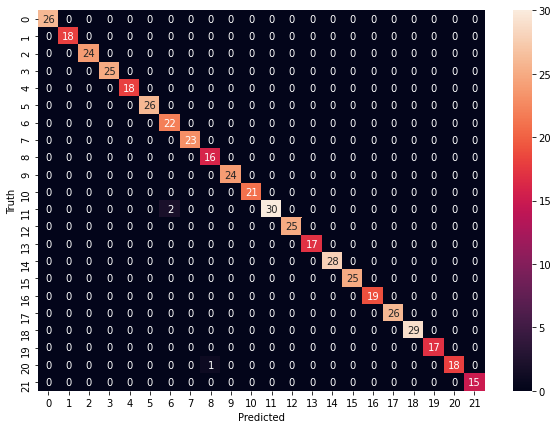

In [185]:
# Plotting the confusion matrix graphically using seaborn library
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [186]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>